In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel

/Users/hritter/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
df = pd.read_pickle('raw_data.pkl')

In [5]:
df1 = df.iloc[:, [1,8,9,2,5,15]]

In [6]:
df2 = df1.convert_objects(convert_numeric=True)

/Users/hritter/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 0 to 1285
Data columns (total 6 columns):
screen_alt_mid_ft    1173 non-null float64
lat                  1173 non-null float64
long                 1173 non-null float64
nitrate_um           1173 non-null int64
chloride_um          1173 non-null int64
B_um                 1171 non-null float64
dtypes: float64(4), int64(2)
memory usage: 64.1 KB


In [8]:
X,y = df2.drop(['screen_alt_mid_ft', 'long', 'nitrate_um', 'chloride_um', 'B_um'], axis=1),df2['nitrate_um']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
X_train

,lat
1075,413820.51
1038,413845.56
142,413805.43
352,413809.54
266,413645.80
1001,413532.02
634,413806.94
989,413738.66
1166,413818.80
1174,413819.49


In [24]:
y_train

1075     29
1038     28
142     216
352      45
266     124
1001     76
634       8
989     174
1166     38
1174     30
918      50
338       1
826      46
876       1
879      61
1202     18
1090      9
41        8
1103     33
324      44
741      92
656      10
579       1
319      58
587      95
608      29
874      12
9       127
890      67
138      14
       ... 
969       1
264     175
860      17
1248     37
391      92
98        8
358      49
609      13
562     489
294       1
1282     27
803     302
1155     35
688       1
1190     42
419      15
1016     19
158      17
1239     20
857       1
469      29
980      43
11      131
1074     30
1110     47
1244      1
1269     32
1122     89
207      54
476     175
Name: nitrate_um, dtype: int64

In [61]:
gp = GaussianProcessRegressor(n_restarts_optimizer=9, normalize_y=True, alpha=1e-5)

In [62]:
gp.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-05, copy_X_train=True, kernel=None,
             n_restarts_optimizer=9, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [63]:
y_pred, sigma = gp.predict(X_test, return_std = True)

In [64]:
gp.score(X_test, y_test)

0.083439956726569231

In [65]:
gp.score(X_train, y_train)

0.53978745383623616

In [66]:
X_test_resize = np.resize(X_test, (len(y_test),))

In [67]:
X_test_resize.sort()

In [68]:
y_pred

array([  44.74483643,  109.76913142,  216.93967788,   32.00022248,
        109.76913142,   67.68298658,   60.00028884,   43.24383275,
         29.64606792,   65.80031477,  163.04729044,   41.41609188,
         27.18200474,   29.60250943,   38.06795199,   38.14226276,
        141.19752763,   27.68431403,   59.3426927 ,   88.61542439,
        182.99728779,  263.99871831,   14.11835179,   59.3426927 ,
        319.66564926,   38.06795199,   71.15551294,   31.66676445,
         41.41609188,   68.07710178,   66.99995326,  124.99993895,
         58.37272938,   49.15192778,   38.06795199,   38.75992527,
        137.67789867,   31.98689343,   50.5402839 ,  122.66664239,
         74.96975921,   46.03844342,   25.24860025,   30.66678215,
         74.96975921,   68.07710178,  124.99993895,  137.67789867,
         29.60250943,  104.6594994 ,   21.79104932,  104.04205402,
        263.99871831,  122.66664239,  137.67789867,   49.29920781,
         46.03844342,   49.15192778,  263.99871831,   89.32473

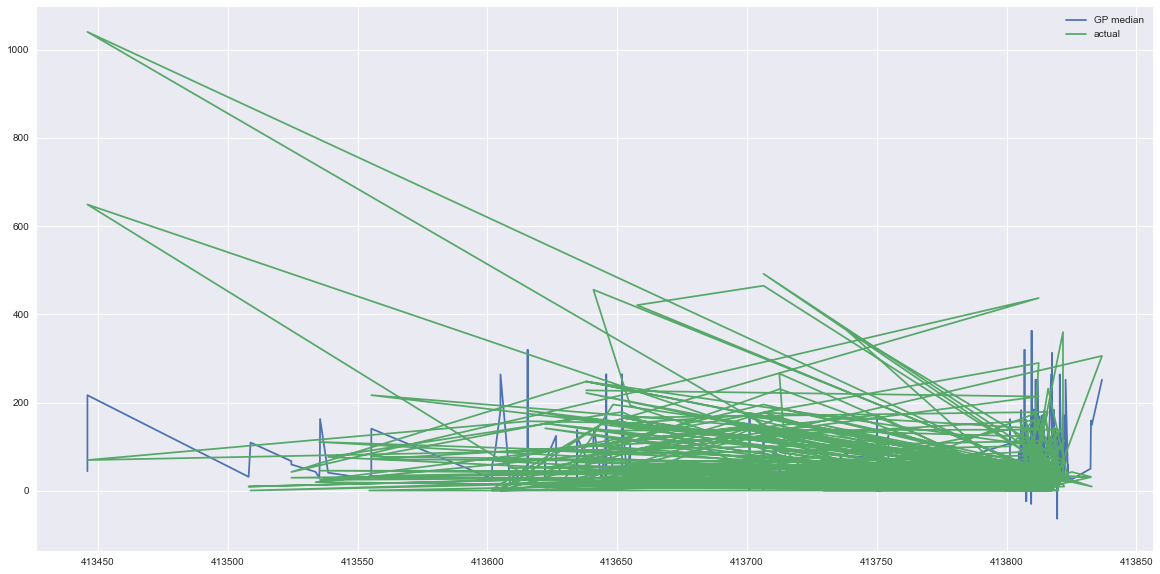

In [69]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(X_test_resize, y_pred, label="GP median")
#ax.scatter(X1d_train, y1d_train, label="train data")
ax.plot(X_test, y_test, label="actual")
ax.fill_between(X_test_resize, y_pred-sigma*y_pred, y_pred+sigma*y_pred, alpha=0.5)
# explicit zorder to draw points and errorbars on top of everything
#ax.errorbar(x, y, yerr=yerr, fmt='ok', zorder=3, label="samples")
#plt.ylim(0, 100)
#plt.xlim(413600,413650)
ax.legend(loc='best')